# Assignment 2 - Optimization Methods
## Matteo Ghilardini
---

### Part 2: programming problem

#### Setup the environment:

Install the required libraries in the jupiter notebook environment:

In [1]:
pip install numpy matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, pow

#### **Problem 1** (Taylor’s expansion of sin function)
_In this problem we consider the univariate function f(x) = sin(x)._

##### 1. Plot the graph of $f(x)$ for $x \in [0,10]$.

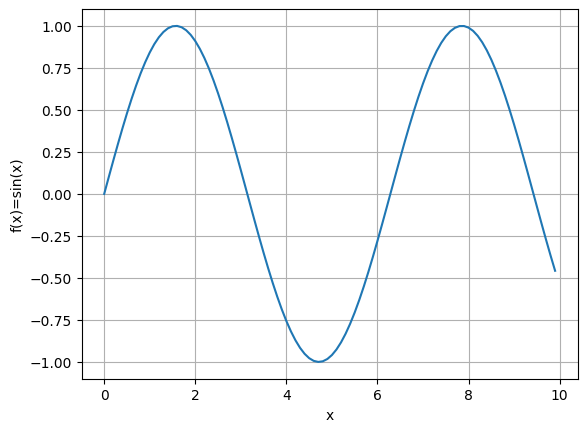

In [3]:
x = np.arange(0, 10, 0.1) # define the interval 
y = np.sin(x) # define the function

plt.plot(x, y)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)=sin(x)')

plt.show()

##### 2. What is the k-th order derivative of $f$ for any $k \ge 0$? Find its analytical form then write a function that calculates the k-th order derivative of $f$ at any point $x \in R$ and for any $k \ge 0$. Note that the zero-th order derivative corresponds to $f$.

In order to find the _k-th order derivate_ of $f(x)=sin(x)$, we start by computing the derivates itself:

0. $f(x) = sin(x)$
1. $f'(x) = cos(x)$
2. $f''(x) = -sin(x)$
3. $f'''(x) = -cos(x)$
4. $f''''(x) = sin(x)$ so is equal to the 0-th derivate, i.e. $f(x)$

This shows that the derivates follows a cyclic period of 4, meaning that the derivate shift by $90\degree$ (i.e. $\pi/2$) at each k. So the resulting function is 
$$
f^k(x) = sin(x+k*\frac{\pi}{2})
$$

In [4]:
def f_kth_derivate(x, k):
    assert k >= 0 and isinstance(k, int), "k must be a non-negative integer"

    return np.sin(x + k * np.pi / 2)

##### 3. Consider the point $\bar{x} = 0$.

(a) Find the form of the tangent line $t^1(x;\bar{x})$ of $f$ at $\bar{x}$ and plot it on top of the graph of $f$ for $x \in [0, 10]$. Recall that the tangent line is the first-order Taylor approximation.  

Considering that:
- the first-order Taylor approximations is $t^1(x; \bar{x}) = f(\bar{x})+\frac{1}{1!}f'(\bar{x})(x-\bar{x}) = f(\bar{x})+f'(\bar{x})(x-\bar{x})$
- $\bar{x}=0$
- $f(x) = sin(x)$ and so, $f'(x) = cos(x)$

We can evaluate the form of the tangent line as:
$$
t^1(x; 0) = sin(0)+cos(0)(x-0) = 0+1*x=x
$$

This is the plot:

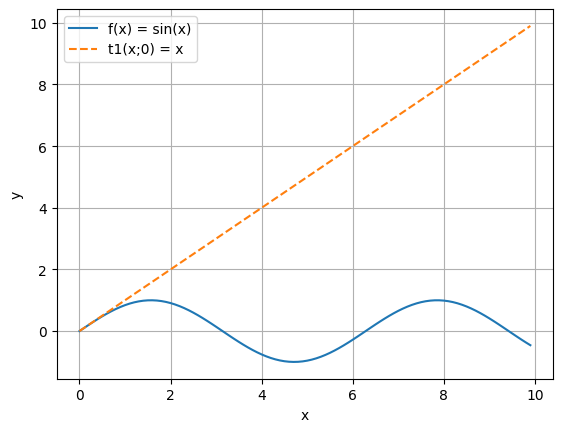

In [5]:
x = np.arange(0, 10, 0.1) # define the interval
y = np.sin(x) # define the function
t1 = x; # define the first order Taylor approximation

plt.plot(x, y, label='f(x) = sin(x)')
plt.plot(x, t1, linestyle="--", label='t1(x;0) = x') # plot the Taylor approximation as a dashed line

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

(b) We now want to compute the k-th order Taylor approximation of $f$ for $k = 3,5,7,...,19$:
$$
t^k(x; \bar{x}) = f(\bar{x})+\frac{1}{1!}f'(\bar{x})(x-\bar{x})+\frac{1}{2!}f^{(2)}(\bar{x})(x-\bar{x})^2+ \dots + \frac{1}{k!}f^{(k)}(\bar{x})(x-\bar{x})^k
$$
Compute and plot each curve $t^k(x;\bar{x}),k = 1,3,5,...,19$ and the graph of $f$ for $x \in [0, 10]$ (all curves need to be on the same figure).

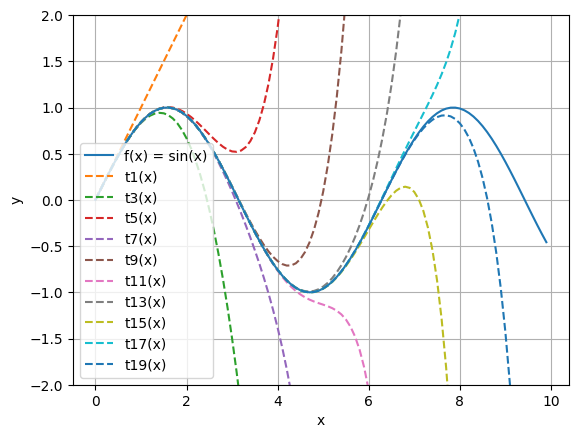

In [6]:
def taylor_k(x, k):
    assert k >= 0 and isinstance(k, int), "k must be a non-negative integer"

    result = np.sin(0) # initialize the result with the value of the function at x_bar=0
    for i in range(0, k+1):
        result += (f_kth_derivate(0, i)/factorial(i)) * (x-0)**i 

    return result

x = np.arange(0, 10, 0.1) # define the interval
y = np.sin(x) # define the function

plt.plot(x, y, label='f(x) = sin(x)')
for k in range(1,20,2):
    t = taylor_k(x, k)
    plt.plot(x, t, linestyle="--", label='t'+str(k)+'(x)') # plot the Taylor approximation as a dashed line

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left') # set the legend to the lower left corner since the most important information is in right side of the plot
plt.ylim(-2, 2) # set the y-axis limits to focus on the Taylor approximations behavior for sin(x) function


plt.show()

We can notice that the higher is $k$, the better aproximate the function $f(x) = sin(x)$ over the specified interval. 

(c) Compute the approximation error of $f$ at $ x = 2$, using the k-th Taylor approx- imation of $f$ at $\bar{x} = 0$, for $k = 1,3,5,...,19$, i.e., calculate
$$
|f(c)-t^k(x;\bar{x})|
$$
for each k. Put the results in a table and comment.

In [7]:
f2 = np.sin(2) # exact value of f(x) with x=2

print("k \t | Approximation Error")
print("------------------------------------")
for k in range(1,20, 2):
    t = taylor_k(2, k)
    error = abs(f2 - t)
    print(str(k) + "\t | " + str(error))

k 	 | Approximation Error
------------------------------------
1	 | 1.0907025731743183
3	 | 0.24263076015901452
5	 | 0.024035906507652083
7	 | 0.0013609188891733348
9	 | 5.001585509478712e-05
11	 | 1.2908628785890386e-06
13	 | 2.469399251747717e-08
15	 | 3.6423364324633667e-10
17	 | 4.269695708103427e-12
19	 | 4.030109579389318e-14


We can notice that the approximation error at $k=1$ is very big, and increasing $k$ it becomes very small. So we can say that the **error trend** is to decrease with the encrease of $k$; this is expected since with an higher $k$, the Taylor approximation includes more terms and so should (and in fact, it does) approximate better the behaviour of the function.  

This quite fast decrease of the approximation error means that the Taylor series tends to converge to the function, and in this case, it is quite fast since we have choosen a term $x=2$ close to $\bar{x}=0$.  

We can also continue applying more terms to the Taylor series, but for $x=2$ already from $k=9$ we have an acceptable error ($\le 10^{-5}$), and from $k=15$ the error is that small that can be considered negligible ($\le 10^{-10}$).

#### **Problem 2** (Gradient Descent)
In this problem we consider the bivariate function $f(x) = 100(x_2 − x^2_1)^2 + (x_1 − 1)^2$.

##### 1. Define a function that computes $f(x)$ for any $x \in \R^2$.

In [8]:
def f(x):
    # considering that the function must be defined as f(x); unpack the input vector as 2 dimensions
    x1 = x[0]
    x2 = x[1]
    # apply the function as given, and return the result
    return 100*(x2 - x1**2)**2 + (x1 - 1)**2

##### 2. Plot the graph of f in 2D using contour plots on $[−2, 2] \times [−2, 2]$, then “zoom in” on the minimum and determine its minimum value and optimal variables visually. _Hint: use the `contour` function in matplotlib.pyplot._

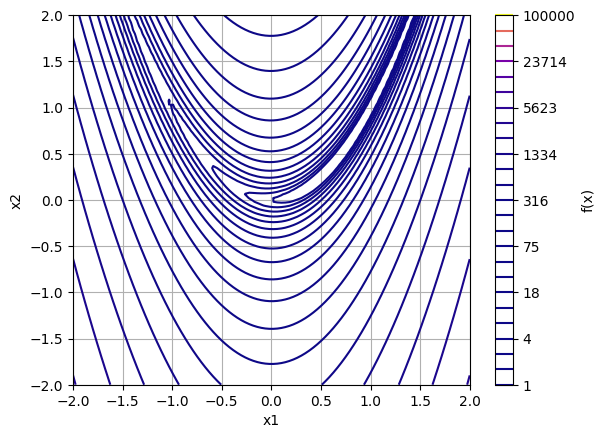

In [9]:
x1 = np.linspace(-2, 2, 100) # define the interval between -2 and 2 with 100 points
x2 = np.linspace(-2, 2, 100) # define the interval between -2 and 2 with 100 points
X1, X2 = np.meshgrid(x1, x2) # create a grid of points x1 and x2
Z = f([X1, X2]) # evaluate the function f(x) over the grid

contour = plt.contour(X1, X2, Z, levels=np.logspace(0, 5, 25), cmap='plasma') # plot the contour lines
plt.colorbar(contour, label='f(x)') # add the color bar in order to interpret the contour plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

<!-- Since the minimum seems to be in the area $[0.5; 1.5] \times [0.5; 1.5]$, i zoom in that area: -->

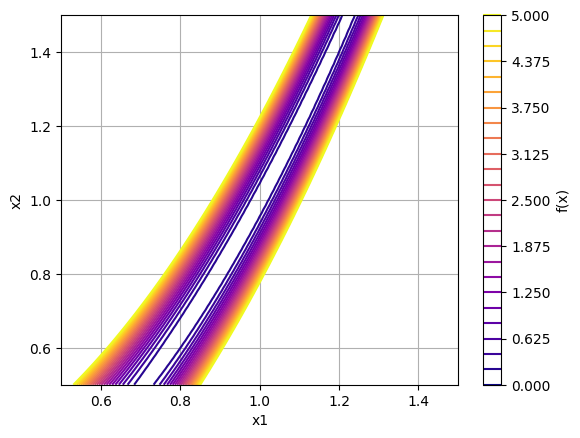

In [10]:
# zoomed grid
x1_zoom = np.linspace(0.5, 1.5, 100)
x2_zoom = np.linspace(0.5, 1.5, 100)
X1_zoom, X2_zoom = np.meshgrid(x1_zoom, x2_zoom)
Z_zoom = f([X1_zoom, X2_zoom])

contour_zoom = plt.contour(X1_zoom, X2_zoom, Z_zoom, levels=np.linspace(0, 5, 25), cmap='plasma') # set the levels in order to have more detailed information close to the minimum
plt.colorbar(contour_zoom, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

From the plot, the minimum seems to be close to $[1,1]$ (looking at the plot and the bars colors). In order to verify it, we can try to compute $f(x)$ over the vector $x\approx[1,1]$:
$$
f([1,1])= 100(1 − 1^2)^2 + (1 − 1)^2 = 100*0 + 0 = 0
$$
This prooves that with $x \approx [1,1]$ we have $f(x)\approx 0$ and so, at his minimum.

##### 3. Plot the graph of $f$ in 3D using contour surface plots. _Hint: use the plot_surface function in matplotlib.pyplot._

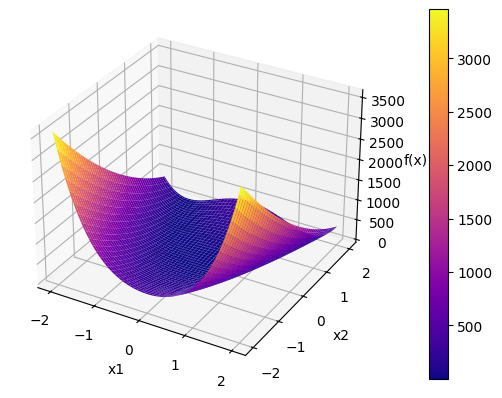

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(X1, X2, Z, cmap='plasma')

fig.colorbar(surface, pad=0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

plt.show()

##### 4. Find the analytical form of the gradient of $f$, $\bigtriangledown f(x)$, and define a function `grad_f` that computes $\bigtriangledown f(x)$ for any $x \in \R^2$.

In order to compute the gradient of $f(x) = 100(x_2 − x^2_1)^2 + (x_1 − 1)^2$ with $x = (x_1, x_2)$, we have to compute the derivate for both $x_1$ and $x_2$ separately:
- Partial derivate with respect to $x_1$ (so, $x_2$ is considered constant):
    - Derivate of the first term $100(x_2 − x^2_1)^2$: 
        - In order to simplify computations, consider $t = x_2 - x_1^2$, and so $100*t^2$
        - Applying the _chain rule_ we get $100*2*t*t'$
        - The derivate of $t$ is $0-2*x_1 = -2x_1$
        - Thus: $\frac{\partial}{\partial x_1}[100(x_2-x_1^2)^2] = 100*2*(x_2-x_1^2)*(-2x_1) = -400x_1(x_2-x_1^2)$
    - Derivate of the second term $(x_1 − 1)^2$: $\frac{\partial}{\partial x_1}[(x_1 − 1)^2] = 2(x_1 − 1)*1 = 2(x_1 − 1)$
    - Thus the partial derivate of $f$ with respect to $x_1$ is:
    $$
    \frac{\partial f}{\partial x_1}=\frac{\partial}{\partial x_1}[100(x_2-x_1^2)^2] + \frac{\partial}{\partial x_1}[(x_1 − 1)^2] = -400x_1(x_2-x_1^2)+2(x_1 − 1)
    $$
- Partial derivate with respect to $x_2$ (so, $x_1$ is considered constant):
    - Derivate of the first term $100(x_2 − x^2_1)^2$: 
        - In order to simplify computations, consider $t = x_2 - x_1^2$, and so $100*t^2$
        - Applying the _chain rule_ we get $100*2*t*t'$
        - The derivate of $t$ is $1-2*0 = 1$
        - Thus $\frac{\partial}{\partial x_2}[100(x_2-x_1^2)^2] = 100*2*(x_2-x_1^2)*1 = 200(x_2-x_1^2)$
    - Derivate of the second term $(x_1 − 1)^2$:$\frac{\partial}{\partial x_2}[(x_1 − 1)^2] = 0$
    - Thus the partial derivate of $f$ with respect to $x_1$ is:
    $$
    \frac{\partial f}{\partial x_2}=\frac{\partial}{\partial x_1}[100(x_2-x_1^2)^2] + \frac{\partial}{\partial x_1}[(x_1 − 1)^2] =  200(x_2-x_1^2)+0 = 200(x_2-x_1^2)
    $$

So the gradient is:
$$
\bigtriangledown f(x) = 
    \begin{pmatrix} 
        \frac{\partial f}{\partial x_1} \\
        \frac{\partial f}{\partial x_2}
    \end{pmatrix}
    = 
    \begin{pmatrix} 
        -400x_1(x_2-x_1^2)+2(x_1 − 1) \\
        200(x_2-x_1^2)
    \end{pmatrix}
$$

In [12]:
def grad_f(x):
    # considering that the function must be defined as f(x); unpack the input vector as 2 dimensions
    x1 = x[0]
    x2 = x[1]
    # calculate the gradient of the function
    df_dx1 = 400*x1**3 - 400*x1*x2 + 2*x1 - 2
    df_dx2 = 200*x2 - 200*x1**2
    # return the gradient as a vector
    return np.array([df_dx1, df_dx2])

In order to verify that everithing is correct, we can try to print the $\bigtriangledown f(x)$ with $x=(1,1)$; since we expect the minimum in $x\approx(1,1)$, we also expect that $\bigtriangledown f(x) \approx (0,0)$.

In [13]:
print(grad_f([1,1]))

[0 0]


##### 5. Write a function that implements the gradient descent algorithm. This function should take as input
- a function $f$ and its gradient $\bigtriangledown f$
- a step size parameter $\alpha$
- a starting point $x_{start}$.
- a maximum number of iterations $max_{iter}$ (default value: $1000$).
- a tolerance level $\epsilon$ for the norm of the gradient (default value: $10^{−6}$).

Moreover this function should return a list containing all iterates of the gradient descent algorithm.

In [14]:
def gradient_descent(f, gradient, alpha, x_start, max_iter=1000, tol=1e-6):
    # I have passed the function f because is requested to be passed as an argument,
    #  but onestly, according to the Gradient Descent Algorithm given in the lecture notes, 
    #  i don't understand why the function f is needed, since we only need the gradient of f.
    k = 0
    x_k = x_start
    g_k = gradient(x_k)
    iterates = [x_k]
    while np.linalg.norm(g_k) > tol and k < max_iter:
        x_k = x_k - alpha * g_k
        g_k = gradient(x_k)
        k += 1
        iterates.append(x_k)
    return iterates


##### 6. Run the gradient descent algorithm for the function $f$ , starting from $x^{(0)} = (0.5, 2)^T$ and using a step size $\alpha = 0.001$. Print the last iterate, plot the trajectory of iterates and comment the results.

In [15]:
x_start = np.array([0.5, 2]) 
alpha = 1e-3

iterates = gradient_descent(f, grad_f, alpha, x_start)
print("Last iterate: ", iterates[-1])

Last iterate:  [1.14982275 1.32264038]


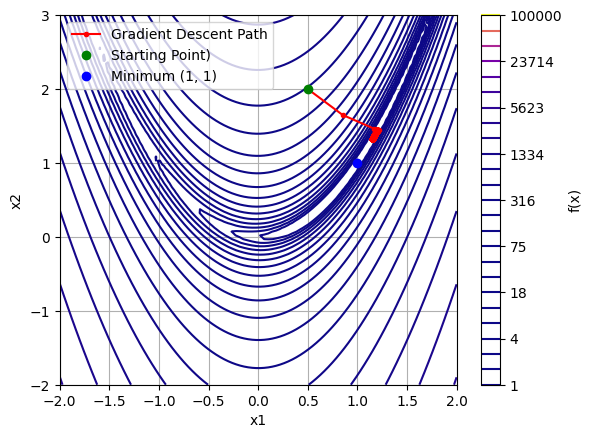

In [16]:
# Create the same contour plot as before
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100) # define the interval between -2 and 3 (more than the previous plot otherwise the starting point 0.5,2 would be on the margin of the plot) with 100 points
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

contour = plt.contour(X1, X2, Z, levels=np.logspace(0, 5, 25), cmap='plasma') # plot the contour lines
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

# Plot the gradient descent path
iterates_array = np.array(iterates)  # Convert list of iterates to array
plt.plot(iterates_array[:, 0], iterates_array[:, 1], 'r.-', label='Gradient Descent Path')
plt.plot(x_start[0], x_start[1], 'go', label='Starting Point)') # plot the starting point as a green circle
plt.plot(1, 1, 'bo', label='Minimum (1, 1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

From the Gradient Descent plot, the first thing that we notice is that the Descent Path don't reach the minimum also if it tends to become closer to it. This fact may us think that simply the number of iterations of the Gradient Descent Algorithm are not enought to converge to the minimum. In order to verify this hypothesis, we can try to run the algorithm with more iterations:

In [17]:
x_start = np.array([0.5, 2]) 
alpha = 1e-3

iterates = gradient_descent(f, grad_f, alpha, x_start, max_iter=100000)
print("Last iterate: ", iterates[-1])

Last iterate:  [1.00000112 1.00000224]


Already from 100'000 iterations we see that the last iteration is very close to the minimum with a negligible error, and so, by plotting it we will see that the last iteration is right on the minimum:

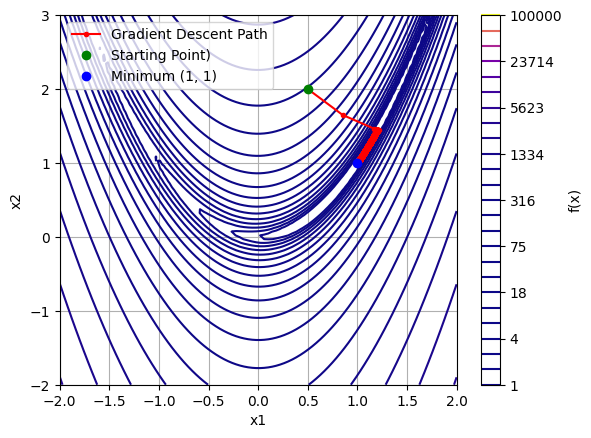

In [18]:
# Create the same contour plot as before
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 3, 100) # define the interval between -2 and 3 (more than the previous plot otherwise the starting point 0.5,2 would be on the margin of the plot) with 100 points
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

contour = plt.contour(X1, X2, Z, levels=np.logspace(0, 5, 25), cmap='plasma') # plot the contour lines
plt.colorbar(contour, label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

# Plot the gradient descent path
iterates_array = np.array(iterates)  # Convert list of iterates to array
plt.plot(iterates_array[:, 0], iterates_array[:, 1], 'r.-', label='Gradient Descent Path')
plt.plot(x_start[0], x_start[1], 'go', label='Starting Point)') # plot the starting point as a green circle
plt.plot(1, 1, 'bo', label='Minimum (1, 1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()